
<div style="padding: 10px">
    <h2 class="h2-title" style="color: black; font-size: 25px !important;
              font-family: Calibri;">
        <b style="color: #00FF66; display: inline-block; font-size: 25px !important;">1. |</b><p style="font-size: 25px !important; display: inline-block;">Imports</p>
    </h2>
</div>

In [1]:
# system library
import os

# math and tables
import pandas as pd
import numpy as np

# for model building
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
tf.random.set_seed(42)
tf.train.Checkpoint
# visualization libraries
import cv2
import matplotlib.pyplot as plt

# some utils
from sklearn.model_selection import train_test_split
from random import randint


<div style="padding: 10px">
    <h2 class="h2-title" style="color: black; font-size: 25px !important;
              font-family: Calibri;">
        <b style="color: #00FF66; display: inline-block; font-size: 25px !important;">2. |</b><p style="font-size: 25px !important; display: inline-block;">Data Loading and Formatting</p>
    </h2>
</div>

In [2]:
data_path = 'Dog Emotion'

class_names = sorted(os.listdir(data_path))
# remove labels.csv because it's not a class
class_names.remove('labels.csv')
num_classes = len(class_names)

img_size = (192, 192, 3)

print(f'{num_classes} classes: {class_names}\nimage size: {img_size}')


images = []
labels = []
labels_df = pd.read_csv('Dog Emotion/labels.csv')

print('\n\nlabels dataframe: \n', labels_df.head())

for image in labels_df.iloc:
    images.append(np.asarray(cv2.resize(cv2.imread(data_path+'/' + image[2] + '/' + image[1], cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1]))
    
    # labels will be in the form of a vector: [0, 1, 0, 0] or [1, 0, 0, 0]
    label = np.zeros(num_classes)
    label[class_names.index(image[2])] = 1
    labels.append(label)

labels = np.asarray(labels)
images = np.asarray(images)

print(f'\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')

4 classes: ['angry', 'happy', 'relaxed', 'sad']
image size: (192, 192, 3)


labels dataframe: 
    Unnamed: 0                               filename    label
0           0  yubL63eiiPmoRru8Z2K2yRo0NnGDCL683.jpg      sad
1           1  c1tVljKiLM9q2zTBuQGWpxmzBuSeBR437.jpg      sad
2           2  RbzNOvY5GIAl3PSjIRTKpEkQs1NByq575.jpg    angry
3           3  gKujaBuWYezz0yWK9ydTFVi6LbQtXe397.jpg    angry
4           4  U0hJ2ryOu1IOuYpc01O7RngPYa8Xvz795.jpg  relaxed


C:\Users\rahul\AppData\Local\Temp\ipykernel_16404\4037633306.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  images.append(np.asarray(cv2.resize(cv2.imread(data_path+'/' + image[2] + '/' + image[1], cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1]))
C:\Users\rahul\AppData\Local\Temp\ipykernel_16404\4037633306.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label[class_names.index(image[2])] = 1



labels shape: (4000, 4)
images shape: (4000, 192, 192, 3)



<div style="padding: 10px">
    <h2 class="h2-title" style="color: black; font-size: 25px !important;
              font-family: Calibri;">
        <b style="color: #00FF66; display: inline-block; font-size: 25px !important;">3. |</b><p style="font-size: 25px !important; display: inline-block;">Display Pictures</p>
    </h2>
</div>

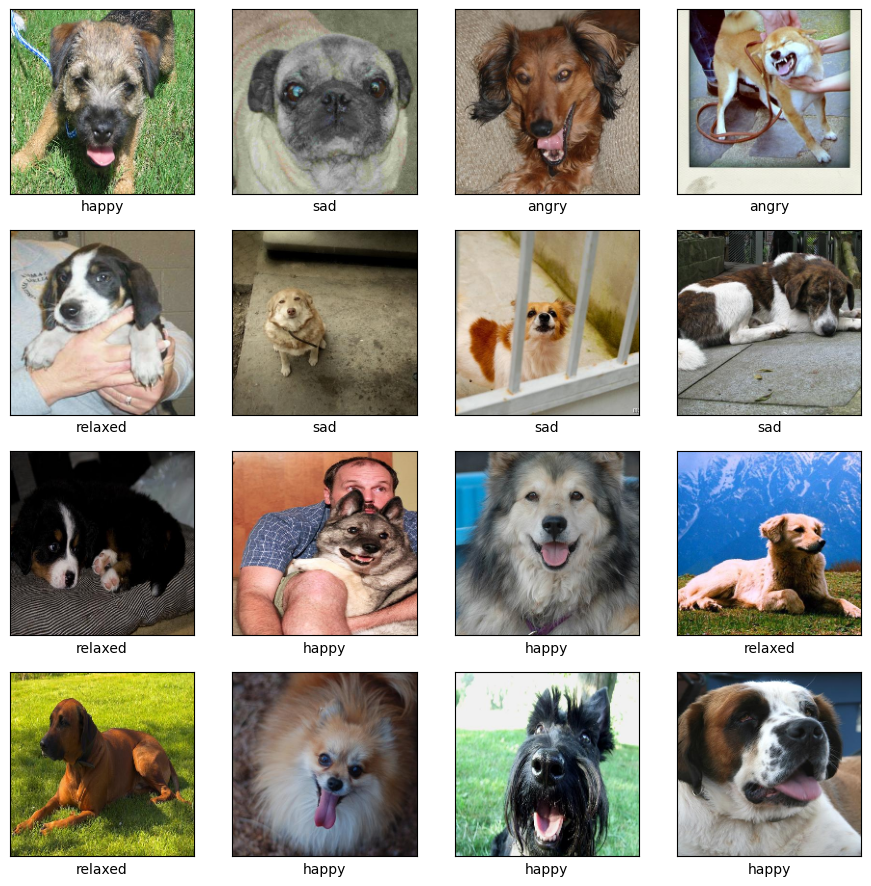

In [3]:
# Display 16 pictures from the dataset
fig, axs = plt.subplots(4, 4, figsize=(11, 11))

for x in range(4):
    for y in range(4):
        i = randint(0, len(images))
        
        axs[x][y].imshow(images[i])
        
        # delete x and y ticks and set x label as picture label
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])
        
plt.show()


<div style="padding: 10px">
    <h2 class="h2-title" style="color: black; font-size: 25px !important;
              font-family: Calibri;">
        <b style="color: #00FF66; display: inline-block; font-size: 25px !important;">4. |</b><p style="font-size: 25px !important; display: inline-block;">Train/Test Split</p>
    </h2>
</div>

In [5]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.15, random_state=42)

print(f'train images shape: {X_train.shape}\ntrain labels shape: {y_train.shape}\n\nvalidation images shape: {X_val.shape}\nvalidation labels shape: {y_val.shape}\n')

train images shape: (3400, 192, 192, 3)
train labels shape: (3400, 4)

validation images shape: (600, 192, 192, 3)
validation labels shape: (600, 4)




<div style="padding: 10px">
    <h2 class="h2-title" style="color: black; font-size: 25px !important;
              font-family: Calibri;">
        <b style="color: #00FF66; display: inline-block; font-size: 25px !important;">5. |</b><p style="font-size: 25px !important; display: inline-block;">CNN Model</p>
    </h2>
</div>

In [6]:
cnn_model = tf.keras.Sequential()

# Inputs and rescaling
cnn_model.add(tf.keras.layers.Rescaling(scale=1. / 255, input_shape=(img_size)))

# Convolutional block 1
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 2
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 3
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 4
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
cnn_model.add(tf.keras.layers.Flatten())

# Dense block
cnn_model.add(tf.keras.layers.Dense(256, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


cnn_model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()

b:\datasets\animal_emotion_detection\.conda\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 192, 192, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 192, 192, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 192, 192, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 96, 96, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 96, 96, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 96, 96, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 256)    │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 48, 48, 256)    │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 512)    │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 512)    │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,020,932 (80.19 MB)

 Trainable params: 21,020,932 (80.19 MB)

 Non-trainable params: 0 (0.00 B)


<div style="padding: 10px">
    <h2 class="h2-title" style="color: black; font-size: 25px !important;
              font-family: Calibri;">
        <b style="color: #00FF66; display: inline-block; font-size: 25px !important;">6. |</b><p style="font-size: 25px !important; display: inline-block;">Model Training</p>
    </h2>
</div>

In [7]:
outputModel = 'outputModel'
model_json = cnn_model.to_json()
with open(outputModel+".json", "w") as json_file:
    json_file.write(model_json)
modWeightsFilepath=outputModel+"_weights.keras"
checkpoint = ModelCheckpoint(modWeightsFilepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')

In [8]:

history = cnn_model.fit(images, labels, epochs=5,steps_per_epoch=50, validation_data=(X_val, y_val), callbacks=checkpoint)

Epoch 1/5
20/50 ━━━━━━━━━━━━━━━━━━━━ 9:57 20s/step - accuracy: 0.2210 - loss: 1.3955 


<div style="padding: 10px">
    <h2 class="h2-title" style="color: black; font-size: 25px !important;
              font-family: Calibri;">
        <b style="color: #00FF66; display: inline-block; font-size: 25px !important;">7. |</b><p style="font-size: 25px !important; display: inline-block;">Accuracy and Loss Plot</p>
    </h2>
</div>

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

history.save("dog_emotion.h5")
model_json = history.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
history.save_weights("model.h5")
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, loss, label='Training Loss')
plt.legend()
plt.title('Training Accuracy and Loss')

plt.figure()
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Validation Accuracy and Loss')

plt.show()

: 


<div style="padding: 10px">
    <h2 class="h2-title" style="color: black; font-size: 25px !important;
              font-family: Calibri;">
        <b style="color: #00FF66; display: inline-block; font-size: 25px !important;">8. |</b><p style="font-size: 25px !important; display: inline-block;">Predictions</p>
    </h2>
</div>

In [ ]:
fig, axs = plt.subplots(7, 4, figsize=(15, 15))

i = 0
for x in range(7):
    for y in range(4):
        prediction = cnn_model.predict(X_val[i][None, ...], verbose=0)[0]
        
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(f'prediction: {class_names[np.argmax(prediction)]} | label: {class_names[np.argmax(y_val[i])]}')
        
        axs[x][y].imshow(X_val[i])
        
        i += 1
plt.show()

: 